In [143]:
import pandas as pd
import numpy as np
import warnings
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.2f}'.format

In [144]:
df_churn= pd.read_csv(r"C:\Users\sijish\Desktop\New folder\telecom_churn_data.csv")

### Inspecting DataFrame

In [145]:
df_churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.38,214.82,213.80,21.10,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,0.00,0.00,0.00,0.00,nan,nan,0.16,nan,nan,nan,4.13,nan,nan,nan,1.15,nan,nan,nan,5.44,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,0.00,0.00,5.44,0.00,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,na

In [146]:
df_churn.shape

(99999, 226)

### Data Cleaning

In [147]:
#Null values > 70 Percent
null_counts = 100*((df_churn.isnull().sum())/len(df_churn))
null_counts[null_counts>30]

date_of_last_rech_data_6   74.85
date_of_last_rech_data_7   74.43
date_of_last_rech_data_8   73.66
date_of_last_rech_data_9   74.08
total_rech_data_6          74.85
total_rech_data_7          74.43
total_rech_data_8          73.66
total_rech_data_9          74.08
max_rech_data_6            74.85
max_rech_data_7            74.43
max_rech_data_8            73.66
max_rech_data_9            74.08
count_rech_2g_6            74.85
count_rech_2g_7            74.43
count_rech_2g_8            73.66
count_rech_2g_9            74.08
count_rech_3g_6            74.85
count_rech_3g_7            74.43
count_rech_3g_8            73.66
count_rech_3g_9            74.08
av_rech_amt_data_6         74.85
av_rech_amt_data_7         74.43
av_rech_amt_data_8         73.66
av_rech_amt_data_9         74.08
arpu_3g_6                  74.85
arpu_3g_7                  74.43
arpu_3g_8                  73.66
arpu_3g_9                  74.08
arpu_2g_6                  74.85
arpu_2g_7                  74.43
arpu_2g_8 

In [148]:
df_churn = df_churn.drop(['av_rech_amt_data_9','av_rech_amt_data_8','av_rech_amt_data_7','av_rech_amt_data_6','night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9','fb_user_9','fb_user_8','fb_user_7','fb_user_6','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9','total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9','max_rech_data_6','max_rech_data_7','max_rech_data_8','max_rech_data_9'],axis=1)

In [149]:
#Null values > 70 Percent
null_counts = 100*((df_churn.isnull().sum())/len(df_churn))
null_counts[null_counts>30]

count_rech_2g_6   74.85
count_rech_2g_7   74.43
count_rech_2g_8   73.66
count_rech_2g_9   74.08
count_rech_3g_6   74.85
count_rech_3g_7   74.43
count_rech_3g_8   73.66
count_rech_3g_9   74.08
arpu_3g_6         74.85
arpu_3g_7         74.43
arpu_3g_8         73.66
arpu_3g_9         74.08
arpu_2g_6         74.85
arpu_2g_7         74.43
arpu_2g_8         73.66
arpu_2g_9         74.08
dtype: float64

In [150]:
df_churn = df_churn.drop(['arpu_2g_6','arpu_2g_7','arpu_2g_8','arpu_2g_9','arpu_3g_9','arpu_3g_8','arpu_3g_7','arpu_3g_6','count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_2g_9','count_rech_3g_6','count_rech_3g_7','count_rech_3g_8','count_rech_3g_9'],axis=1)

In [151]:
df_churn = df_churn.drop(['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9'],axis=1)

In [152]:
#Null values > 0 Percent
null_counts = 100*((df_churn.isnull().sum())/len(df_churn))
null_counts[null_counts>0]

loc_og_t2o_mou     1.02
std_og_t2o_mou     1.02
loc_ic_t2o_mou     1.02
onnet_mou_6        3.94
onnet_mou_7        3.86
onnet_mou_8        5.38
onnet_mou_9        7.75
offnet_mou_6       3.94
offnet_mou_7       3.86
offnet_mou_8       5.38
offnet_mou_9       7.75
roam_ic_mou_6      3.94
roam_ic_mou_7      3.86
roam_ic_mou_8      5.38
roam_ic_mou_9      7.75
roam_og_mou_6      3.94
roam_og_mou_7      3.86
roam_og_mou_8      5.38
roam_og_mou_9      7.75
loc_og_t2t_mou_6   3.94
loc_og_t2t_mou_7   3.86
loc_og_t2t_mou_8   5.38
loc_og_t2t_mou_9   7.75
loc_og_t2m_mou_6   3.94
loc_og_t2m_mou_7   3.86
loc_og_t2m_mou_8   5.38
loc_og_t2m_mou_9   7.75
loc_og_t2f_mou_6   3.94
loc_og_t2f_mou_7   3.86
loc_og_t2f_mou_8   5.38
loc_og_t2f_mou_9   7.75
loc_og_t2c_mou_6   3.94
loc_og_t2c_mou_7   3.86
loc_og_t2c_mou_8   5.38
loc_og_t2c_mou_9   7.75
loc_og_mou_6       3.94
loc_og_mou_7       3.86
loc_og_mou_8       5.38
loc_og_mou_9       7.75
std_og_t2t_mou_6   3.94
std_og_t2t_mou_7   3.86
std_og_t2t_mou_8

In [153]:
df_churn.shape

(99999, 178)

In [154]:
# Impute in place on Null values
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer()
New_churn = pd.DataFrame(my_imputer.fit_transform(df_churn))
New_churn.columns=df_churn.columns

In [155]:
New_churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753.00,109.00,0.00,0.00,0.00,197.38,214.82,213.80,21.10,132.40,133.67,0.00,130.30,197.94,197.05,0.00,190.34,9.95,7.15,0.00,6.34,13.91,9.82,0.00,8.56,47.10,46.47,0.00,44.58,93.34,91.40,0.00,90.46,3.75,3.79,0.00,3.66,1.12,1.37,0.00,1.23,144.20,141.67,0.00,138.71,79.83,83.30,0.00,82.34,87.30,90.80,0.00,86.28,1.13,1.12,0.00,1.04,0.00,0.00,0.00,0.00,168.26,175.22,0.00,169.66,0.80,0.78,0.00,0.72,3.92,4.98,0.00,4.41,0.45,0.03,0.00,0.05,0.00,0.00,0.00,0.00,47.92,47.99,0.16,46.28,107.48,107.12,4.13,106.16,12.08,12.60,1.15,12.17,167.49,167.72,5.44,164.62,9.58,10.01,0.00,9.43,20.72,21.66,0.00,19.62,2.16,2.22,0.00,2.17,0.00,0.00,0.00,0.00,32.46,33.89,0.00,31.23,0.00,0.00,5.44,0.00,0.06,0.03,0.00,0.16,7.46,8.33,0.00,8.06,0.85,1.01,0.00,1.02,4.00,3.00,2.00,6.00,362.00,252.00,252.00,0.00,252.00,252.00,252.00,0.00,252.00,252.00,252.00,0.00,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,968.00,30.40,0.00,101.20,3.58
1,7001865778.00,109.00,0.00,0.00,0.00,34.05,355.07,268.32,86.28,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.00,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.23,4.58,0.13,0.00,0.00,0.00,0.00,0.00,4.68,23.43,12.76,0.00,0.00,0.00,0.0

### Data Preperation

In [156]:
#Columns having Variance equal to Zero
std= New_churn.std(axis = 0, skipna = True) 
std[std<1]

circle_id          0.00
loc_og_t2o_mou     0.00
std_og_t2o_mou     0.00
loc_ic_t2o_mou     0.00
std_og_t2c_mou_6   0.00
std_og_t2c_mou_7   0.00
std_og_t2c_mou_8   0.00
std_og_t2c_mou_9   0.00
std_ic_t2o_mou_6   0.00
std_ic_t2o_mou_7   0.00
std_ic_t2o_mou_8   0.00
std_ic_t2o_mou_9   0.00
spl_ic_mou_6       0.16
spl_ic_mou_7       0.15
spl_ic_mou_8       0.14
spl_ic_mou_9       0.51
monthly_2g_6       0.30
monthly_2g_7       0.30
monthly_2g_8       0.30
monthly_2g_9       0.28
monthly_3g_6       0.36
monthly_3g_7       0.39
monthly_3g_8       0.38
monthly_3g_9       0.38
sachet_3g_6        0.57
sachet_3g_7        0.63
sachet_3g_8        0.66
sachet_3g_9        0.65
dtype: float64

In [157]:
#Removing Near Zero Variance Columns
New_churn = New_churn.drop(['std_ic_t2o_mou_9','std_ic_t2o_mou_8','std_ic_t2o_mou_7','std_ic_t2o_mou_6','loc_og_t2o_mou','std_og_t2o_mou','circle_id','loc_ic_t2o_mou','std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_og_t2c_mou_9'],axis=1)

In [158]:
New_churn.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753.00,197.38,214.82,213.80,21.10,132.40,133.67,0.00,130.30,197.94,197.05,0.00,190.34,9.95,7.15,0.00,6.34,13.91,9.82,0.00,8.56,47.10,46.47,0.00,44.58,93.34,91.40,0.00,90.46,3.75,3.79,0.00,3.66,1.12,1.37,0.00,1.23,144.20,141.67,0.00,138.71,79.83,83.30,0.00,82.34,87.30,90.80,0.00,86.28,1.13,1.12,0.00,1.04,168.26,175.22,0.00,169.66,0.80,0.78,0.00,0.72,3.92,4.98,0.00,4.41,0.45,0.03,0.00,0.05,0.00,0.00,0.00,0.00,47.92,47.99,0.16,46.28,107.48,107.12,4.13,106.16,12.08,12.60,1.15,12.17,167.49,167.72,5.44,164.62,9.58,10.01,0.00,9.43,20.72,21.66,0.00,19.62,2.16,2.22,0.00,2.17,32.46,33.89,0.00,31.23,0.00,0.00,5.44,0.00,0.06,0.03,0.00,0.16,7.46,8.33,0.00,8.06,0.85,1.01,0.00,1.02,4.00,3.00,2.00,6.00,362.00,252.00,252.00,0.00,252.00,252.00,252.00,0.00,252.00,252.00,252.00,0.00,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,968.00,30.40,0.00,101.20,3.58
1,7001865778.00,34.05,355.07,268.32,86.28,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.00,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0.00,0.23,4.58,0.13,0.00,0.00,0.00,0.00,0.00,4.68,23.43,12.76,0.00,0.00,0.00,0.00,0.00,40.31,178.53,312.44,72.11,1.61,29.91,29.23,116.09,17.48,65.38,375.58,56.93,0.00,8.93,3.61,0.00,19.09,104.23,408.43,173.03,0.00,0.00,2.35,0.00,5.90,0.00,12.49,15.01,0.00,0.00,0.00,0.00,5.90,0.00,14.84,15.01,26.83,104.23,423.28,188.04,0.00,0.00,0.00,0.00,1.83,0.00,0.00,0.00,0.00,0.00,0.00,

### Filter High Value Customers

In [159]:
New_churn['tot67']=New_churn.total_rech_amt_6 + New_churn.total_rech_amt_7

In [160]:
New_churn.tot67 = New_churn.tot67/2

In [161]:
New_churn.tot67.quantile(0.7)

368.5

In [162]:
New_churn = New_churn[New_churn['tot67']>368.5]

In [163]:
# 29.9k Rows
New_churn.shape

(29979, 167)

In [164]:
New_churn = New_churn.drop(['tot67'],axis=1)

In [165]:
New_churn.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
7,7000701601.00,1069.18,1349.85,3171.48,500.00,57.84,54.68,52.29,130.30,453.43,567.16,325.91,190.34,16.23,33.49,31.64,6.34,23.74,12.59,38.06,8.56,51.39,31.38,40.28,44.58,308.63,447.38,162.28,90.46,62.13,55.14,53.23,3.66,0.00,0.00,0.00,1.23,422.16,533.91,255.79,138.71,4.30,23.29,12.01,82.34,49.89,31.76,49.14,86.28,6.66,20.08,16.68,1.04,60.86,75.14,77.84,169.66,0.00,0.18,10.01,0.72,4.50,0.00,6.50,4.41,0.00,0.00,0.00,0.05,487.53,609.24,350.16,0.00,58.14,32.26,27.31,46.28,217.56,221.49,121.19,106.16,152.16,101.46,39.53,12.17,427.88,355.23,188.04,164.62,36.89,11.83,30.39,9.43,91.44,126.99,141.33,19.62,52.19,34.24,22.21,2.17,180.54,173.08,193.94,31.23,626.46,558.04,428.74,0.00,0.21,0.00,0.00,0.16,2.06,14.53,31.59,8.06,15.74,15.19,15.14,1.02,5.00,5.00,7.00,3.00,1580.00,790.00,3638.00,0.00,1580.00,790.00,1580.00,0.00,0.00,0.00,779.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,802.00,57.74,19.38,18.74,0.00
8,7001524846.00,378.72,492.22,137.36,166.79,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.00,0.00,7.15,0.00,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.33,13.69,10.04,75.69,74.13,0.00,0.00,0.00,0.00,130.26,143.48,98.28,81.46,0.00,0.00,0.00,0.00,0.00,0.00,10.23,0.00,0.00,0.00,0.00,0.00,508.36,431.66,171.56,142.18,23.84,9.84,0.31,4.03,57.58,13.98,15.48,17.34,0.00,0.00,0.00,0.00,81.43,23.83,15.79,21.38,0.00,0.58,0.10,0.00,22.43,4.08,0.65,13.53,0.00,0.00,0.00,0.00,22.43,4.66,0.75,13.53,103.86,28.4

### Deriving Churn(Target) Column

In [166]:
New_churn["total_og_mou_9"] = pd.to_numeric(New_churn["total_og_mou_9"])
New_churn["total_ic_mou_9"] = pd.to_numeric(New_churn["total_ic_mou_9"])
New_churn["vol_2g_mb_9"] = pd.to_numeric(New_churn["vol_2g_mb_9"])
New_churn["vol_3g_mb_9"] = pd.to_numeric(New_churn["vol_3g_mb_9"])


In [167]:
New_churn['churn'] = ((New_churn['total_ic_mou_9']== 0) & (New_churn['total_og_mou_9']== 0) & (New_churn['vol_2g_mb_9'] == 0) & (New_churn['vol_3g_mb_9']==0)).astype(int)


In [168]:
New_churn = New_churn.drop(['arpu_9','onnet_mou_9','offnet_mou_9','roam_ic_mou_9','roam_og_mou_9','loc_og_t2t_mou_9','loc_og_t2m_mou_9','loc_og_t2f_mou_9','loc_og_t2c_mou_9','loc_og_mou_9','std_og_t2t_mou_9','std_og_t2m_mou_9','std_og_t2f_mou_9','std_og_mou_9','isd_og_mou_9','spl_og_mou_9','og_others_9','total_og_mou_9','loc_ic_t2t_mou_9','loc_ic_t2m_mou_9','loc_ic_t2f_mou_9','loc_ic_mou_9','std_ic_t2t_mou_9','std_ic_t2m_mou_9','std_ic_t2f_mou_9','std_ic_mou_9','total_ic_mou_9','spl_ic_mou_9','isd_ic_mou_9','ic_others_9','total_rech_num_9','total_rech_amt_9','max_rech_amt_9','last_day_rch_amt_9','vol_2g_mb_9','vol_3g_mb_9','monthly_2g_9','sachet_2g_9','monthly_3g_9','sachet_3g_9','sep_vbc_3g'],axis=1)

In [169]:
New_churn.head()


,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn
7,7000701601.00,1069.18,1349.85,3171.48,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.00,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.00,0.18,10.01,4.50,0.00,6.50,0.00,0.00,0.00,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.00,0.00,2.06,14.53,31.59,15.74,15.19,15.14,5.00,5.00,7.00,1580.00,790.00,3638.00,1580.00,790.00,1580.00,0.00,0.00,779.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,802.00,57.74,19.38,18.74,1
8,7001524846.00,378.72,492.22,137.36,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.00,0.00,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.00,0.00,0.00,0.00,0.00,10.23,0.00,0.00,0.00,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19.00,21.00,14.00,437.00,601.00,120.00,90.00,154.00,30.00,50.00,0.00,10.00,0.00,356.00,0.03,0.00,750.95,11.94,0.00,1.00,0.00,0.00,1.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,315.00,21.03,910.65,122.16,0
13,7002191713.00,492.85,205.67,593.26,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.00,0.00,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.00,0.00,1.29,0.00,0.00,4.78,0.00,0.00,0.00,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.00,0.00,245.28,62.11,393.39,83.48,16.24,21.44,6.00,4.00,11.00,507.00,253.00,717.00,110.00,110.00,130.00,110.00,50.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,0

In [170]:
New_churn.shape

(29979, 126)

##### Data Imbalance

In [171]:
100*(New_churn.churn.value_counts()/New_churn.churn.count())

0   91.36
1    8.64
Name: churn, dtype: float64

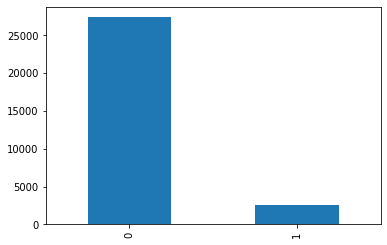

In [172]:
import matplotlib.pyplot as plt
New_churn['churn'].value_counts().plot(kind='bar')

In [173]:
uniq=New_churn.pop("mobile_number")

In [174]:
W=New_churn.drop(['churn'],axis=1)

In [175]:
y=New_churn['churn']

### Scaling the data

In [176]:
import sklearn
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [177]:
x = scaler.fit_transform(W)

##### Applying PCA on the data

In [178]:
from sklearn.decomposition import PCA
pca=PCA(random_state=42)

In [179]:
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [180]:
pca.components_

array([[ 1.28166276e-01,  1.36599405e-01,  1.44704660e-01, ...,
         5.36715930e-02,  4.88528152e-02,  4.61504472e-02],
       [ 1.18599818e-01,  1.43259510e-01,  1.31303868e-01, ...,
        -5.50506858e-02, -5.84079333e-02, -5.68658768e-02],
       [ 1.50903723e-01,  1.76915239e-01,  1.72670272e-01, ...,
         1.97641546e-01,  2.02841887e-01,  1.93313899e-01],
       ...,
       [ 1.18522965e-07, -2.94581753e-07, -7.76767139e-08, ...,
        -1.19896076e-07, -1.04238131e-07,  1.97523856e-10],
       [ 1.34678685e-07,  1.14107539e-07, -2.00048920e-07, ...,
         2.97585671e-08, -3.84458665e-08, -1.26348928e-08],
       [-2.04724531e-07, -2.08194275e-07,  3.00978568e-08, ...,
        -2.00267108e-08,  4.29799959e-08,  3.49875871e-09]])

In [181]:
pca.explained_variance_ratio_

array([9.80251469e-02, 8.72233635e-02, 5.75451071e-02, 4.76381248e-02,
       3.93024640e-02, 3.67724728e-02, 3.11155616e-02, 2.80212641e-02,
       2.69141618e-02, 2.53586018e-02, 2.40413267e-02, 2.28373677e-02,
       2.22112817e-02, 2.14833008e-02, 2.09877049e-02, 1.96187409e-02,
       1.66613184e-02, 1.57753780e-02, 1.52403596e-02, 1.43677187e-02,
       1.37816002e-02, 1.26653202e-02, 1.13327369e-02, 1.10552700e-02,
       1.09464055e-02, 1.02359711e-02, 9.92317486e-03, 9.45064180e-03,
       9.19141475e-03, 8.27912219e-03, 7.99923583e-03, 7.75367695e-03,
       7.43933492e-03, 7.28335297e-03, 6.86430920e-03, 6.67541444e-03,
       6.56450061e-03, 6.39253570e-03, 6.33101430e-03, 6.09205114e-03,
       5.94060042e-03, 5.81320375e-03, 5.25014914e-03, 5.15583109e-03,
       5.04858582e-03, 4.99845767e-03, 4.75020681e-03, 4.54237372e-03,
       4.22075400e-03, 4.02357821e-03, 3.93279352e-03, 3.83232543e-03,
       3.72348937e-03, 3.60766576e-03, 3.43372155e-03, 3.39163047e-03,
      

<BarContainer object of 124 artists>

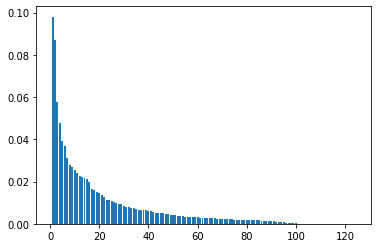

In [182]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_)

In [183]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

#### Scree PLot

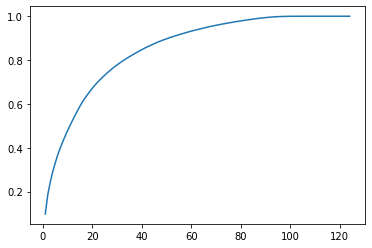

In [184]:
plt.plot(range(1,len(var_cumu)+1), var_cumu)

#### PCA Components based on Scree Plot


In [185]:
pc60 = PCA(n_components = 60, random_state = 42)

In [186]:
W1 = pc60.fit_transform(x)

In [187]:
W1.shape

(29979, 60)

In [188]:
X=pd.DataFrame(W1)
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
0,6.93,-0.43,5.88,1.51,4.60,-4.15,1.12,-1.01,3.89,-1.57,0.43,-0.77,-0.90,0.32,0.80,1.25,-2.97,1.46,-1.78,-0.65,-1.70,0.60,4.28,-0.15,0.47,-3.40,-1.31,-1.30,-0.70,2.36,0.80,0.15,2.16,2.13,0.79,-1.97,-2.15,-0.39,0.96,0.27,0.49,-1.72,-0.59,-0.13,-0.92,0.35,-2.13,0.87,1.12,-0.16,-0.19,0.57,1.12,-0.12,-0.93,0.83,-2.13,-3.70,-0.17,0.12
1,-2.81,-1.06,-0.18,-0.89,-1.40,0.50,0.29,1.22,0.48,0.53,-0.44,0.58,0.14,-0.07,-0.08,0.06,1.05,-0.01,0.21,-0.10,0.01,-0.20,-0.65,-0.36,-0.41,-0.15,-1.02,0.00,-0.21,0.89,-0.35,-0.25,0.02,-0.23,-0.76,-0.19,-0.51,-0.25,-0.01,0.42,0.91,0.49,0.20,0.25,-0.22,-0.72,-0.05,-0.41,1.51,-0.04,1.16,1.72,-0.69,-0.29,0.09,0.03,-0.06,0.17,0.25,-0.10
2,0.84,0.31,-0.82,5.56,-0.22,-1.18,1.76,0.79,-0.52,1.33,-0.48,-1.52,2.15,3.83,4.69,-0.50,-0.48,-0.20,-0.53,-0.65,-0.20,-0.51,2.25,-0.26,1.06,1.08,0.15,0.18,2.43,-0.80,-0.77,1.06,-0.95,-0.45,-0.33,0.64,1.06,0.32,0.31,0.95,-0.38,-0.05,-1.81,0.64,-1.01,-1.14,0.32,1.23,0.01,2.07,1.49,-0.24,1.01,-0.53,-0.05,-0.10,-0.63,0.41,0.47,-0.62
3,-0.90,-2.04,-1.08,1.17,0.74,-0.65,0.18,0.34,-0.53,0.87,0.01,-0.23,-0.82,-0.15,-0.15,-0.04,-0.07,0.12,-0.11,0.37,0.09,0.04,-0.22,-0.04,0.15,-0.10,0.22,-0.02,0.08,0.16,0.15,-0.27,-0.07,0.21,-0.28,-0.04,-0.94,-0.24,-0.04,0.06,0.07,-0.21,0.17,0.06,0.08,0.16,0.01,-0.11,0.01,-0.39,-0.22,-0.01,-0.05,-0.05,0.54,-0.25,0.40,0.11,0.01,0.50
4,-4.17,-0.58,-1.14,-0.36,-0.38,-1.30,0.74,-0.38,-0.82,1.56,1.47,1.83,0.02,-0.66,0.60,-0.23,0.13,-0.05,-0.03,-0.21,0.18,-0.06,0.68,-0.60,0.70,0.27,0.42,-0.02,0.35,-0.26,-0.94,0.54,0.29,0.64,-0.48,0.32,-0.27,0.37,-0.56,-0.58,1.63,0.16,0.25,0.11,-0.04,0.17,-0.04,-0.14,0.17,0.23,-0.59,0.25,0.01,0.04,-0.13,0.12,-0.08,0.02,-0.11,-0.19


In [189]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

### Logistic Regression

In [190]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [191]:
# Sensitivity is Very Low
# Default Parameters
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
print("Accuracy: {0}".format(metrics.accuracy_score(y_test,y_pred)))
print("Recall/Sensitivity: {0}".format(metrics.recall_score(y_test,y_pred)))

Accuracy: 0.9113853680231265
Recall/Sensitivity: 0.16441717791411042


In [192]:
# Balancing Class weight has helped in improving Sensitivity
logreg = LogisticRegression(penalty ='l2',C=0.1,class_weight ='balanced')
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
print("Accuracy: {0}".format(metrics.accuracy_score(y_test,y_pred)))
print("Recall/Sensitivity: {0}".format(metrics.recall_score(y_test,y_pred)))

Accuracy: 0.8034245052257061
Recall/Sensitivity: 0.8159509202453987


##### Finding the Best parameters with GridsearchCV

In [193]:
params= {'C':[0.0001,0.001,0.01,0.1,0.2,0.3,0.4,0.5,0.6,1,2], 'penalty':['l1','l2'], 'class_weight':['balanced',{0:0.10, 1:0.90}]}
logmodel = LogisticRegression()
from sklearn.model_selection import GridSearchCV
model = GridSearchCV(estimator = logmodel,cv=5,param_grid = params,scoring = 'recall')
model.fit(X_train,y_train)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                               0.6, 1, 2],
                         'class_weight': ['balanced', {0: 0.1, 1: 0.9}],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r

In [194]:
model.best_score_

0.9069857796663067

In [195]:
model.best_params_

{'C': 0.0001, 'class_weight': {0: 0.1, 1: 0.9}, 'penalty': 'l2'}

In [196]:
# Final Senitivity is around 89%
logreg = LogisticRegression(penalty ='l2',C=0.0001,class_weight = {0: 0.1, 1: 0.9})
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
print("Accuracy: {0}".format(metrics.accuracy_score(y_test,y_pred)))
print("Recall/Sensitivity: {0}".format(metrics.recall_score(y_test,y_pred)))

Accuracy: 0.5620413609072715
Recall/Sensitivity: 0.894478527607362


### Random forest

In [197]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)
y_pred = rf_model.predict(X_test)
print("Accuracy: {0}".format(metrics.accuracy_score(y_test,y_pred)))
print("Recall/Sensitivity: {0}".format(metrics.recall_score(y_test,y_pred)))

Accuracy: 0.9126084056037358
Recall/Sensitivity: 0.11779141104294479


In [198]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(class_weight = 'balanced',criterion ='gini',max_features='auto',max_depth = 32,min_samples_leaf =200,min_samples_split=500,n_estimators=200)
rf_model.fit(X_train,y_train)
y_pred = rf_model.predict(X_test)
print("Accuracy: {0}".format(metrics.accuracy_score(y_test,y_pred)))
print("Recall/Sensitivity: {0}".format(metrics.recall_score(y_test,y_pred)))

Accuracy: 0.8420057816321992
Recall/Sensitivity: 0.7361963190184049


##### Finding the Best parameters with GridsearchCV

In [199]:
param_grid = { "criterion" : ["entropy"], "min_samples_leaf" : [100, 200], "min_samples_split" : [400,500], "n_estimators": [100, 200, 300],'class_weight':['balanced']}
from sklearn.model_selection import GridSearchCV, cross_val_score
rf = RandomForestClassifier(n_estimators=1,warm_start = True, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)
clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)
clf.fit(X_train, y_train)
clf.best_params_ 

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'min_samples_leaf': 100,
 'min_samples_split': 400,
 'n_estimators': 300}

In [200]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(class_weight = 'balanced',criterion ='gini',max_features='auto',min_samples_leaf =100,min_samples_split=400,n_estimators=100)
rf_model.fit(X_train,y_train)
y_pred = rf_model.predict(X_test)
print("Accuracy: {0}".format(metrics.accuracy_score(y_test,y_pred)))
print("Recall/Sensitivity: {0}".format(metrics.recall_score(y_test,y_pred)))


Accuracy: 0.8471203024238381
Recall/Sensitivity: 0.7374233128834355


###### Based on evaluation we understand that logistic regression model does a better job in predicitng Churners.

### Feature Importance

In [201]:
F=New_churn.drop(['churn'],axis=1)
ch=New_churn['churn']
F.shape

(29979, 124)

[0.0084106  0.0085737  0.02425425 0.00822734 0.00682194 0.01162968
 0.00871012 0.00810067 0.01190853 0.00530467 0.00583238 0.01451712
 0.00618651 0.00730071 0.02867495 0.00614212 0.00708974 0.00713553
 0.00658505 0.01013786 0.01218611 0.00518768 0.00487533 0.00477683
 0.00581004 0.0057215  0.00604458 0.00717238 0.00684956 0.01187452
 0.00981311 0.00809935 0.01466864 0.01092908 0.00923948 0.01393482
 0.00280071 0.00242569 0.00633586 0.01227227 0.00918905 0.01815154
 0.00416027 0.00339729 0.00784916 0.00617842 0.00644325 0.0061246
 0.00607734 0.00147597 0.02043074 0.00909565 0.01352264 0.02361624
 0.00733153 0.00785881 0.01056649 0.00781408 0.00886768 0.02134161
 0.00613288 0.00617217 0.00548468 0.00741658 0.01059008 0.01772669
 0.0059235  0.0060765  0.00509526 0.0067169  0.00681732 0.00685085
 0.00420416 0.00356817 0.00389154 0.00633613 0.00716204 0.00720664
 0.00729781 0.00934968 0.01446997 0.00608414 0.00357647 0.01812163
 0.00525596 0.004252   0.0043483  0.00490375 0.00463195 0.00345

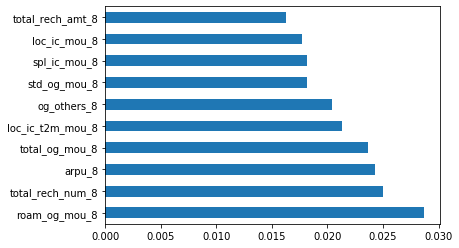

In [202]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#apply SelectKBest class to extract top 10 best features
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(F,ch)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=F.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


##### From the above model we can understand that high values customers churn majorly due to reasons related to outgoing calls and minutes they spend over calls. Most of the issues are related to outgoing call so It might be due to call quality, charges or recharge options. If the company could find the underlying issues related to these the churn could be controlled.
